# Waffle Charts, Word Clouds, and Regression Plots

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Create Word cloud and Waffle charts
-   Create regression plots with Seaborn library


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with _p_andas](#0)<br>
2.  [Downloading and Prepping Data](#2)<br>
3.  [Visualizing Data using Matplotlib](#4) <br>
4.  [Waffle Charts](#6) <br>
5.  [Word Clouds](#8) <br>
6.  [Regression Plots](#10) <br> 
    </div>


# Exploring Datasets with _pandas_ and Matplotlib<a id="0"></a>

Toolkits: The course heavily relies on [_pandas_](http://pandas.pydata.org/?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740) and [**Numpy**](http://www.numpy.org/?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.


# Downloading and Prepping Data <a id="2"></a>


Import Primary Modules:


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using _pandas_ `read_excel()` method. Normally, before we can do that, we would need to download a module which _pandas_ requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:

```
!conda install -c anaconda xlrd --yes
```


Download the dataset and read it into a _pandas_ dataframe:


In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's find out how many entries there are in our dataset


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to _Introduction to Matplotlib and Line Plots_ and _Area Plots, Histograms, and Bar Plots_ for a detailed description of this preprocessing.


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = map(str, df_can.columns)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib<a id="4"></a>


Import `matplotlib`:


In [640]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches     # for waffle charts

In [641]:
mpl.style.available
mpl.style.use('ggplot')

# Waffle Charts <a id="6"></a>

A `waffle chart` is an interesting visualization that is normally created **to display progress toward goals**. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [642]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden']]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [643]:
# compute the proportion of each category with respect to the total
total_sum = sum(df_dns['Total'])
prop = [value / total_sum for value in df_dns['Total']]
prop

# 또는
# for value in df_dns['Total'] :
#     prop = value/total_sum
#     print(prop)              # list화가 되지 않아서 not iterabl

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [644]:
for i, p in enumerate(prop) :
    print(df_dns.index[i], ':', p)

Denmark : 0.32255663965602777
Norway : 0.1924094592359848
Sweden : 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [645]:
width = 40
height = 10
tiles = width * height    
print('Total number of tiles is', tiles)

Total number of tiles is 400


**Step 3.** The third step is using the proportion of each category to determe its respective number of tiles


In [646]:
tile = [round(p * tiles) for p in prop]     # round: 반올림 함수
tile

[129, 77, 194]

In [647]:
for i, t in enumerate(tile) :
    print(df_dns.index[i], ':', t)

Denmark : 129
Norway : 77
Sweden : 194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [648]:
# 빈 matrix(행렬) 생성
waffle = np.zeros(shape=(height, width))      # 0으로 채워진 행렬 생성
waffle

# Populate the chart
country_index = 1     # 각 나라에 따라 바뀌는 index
tile_index = 0        # 채워진 타일 수

for col in range(width) :
    for row in range(height) :
        tile_index += 1      # 세로줄로 돌아가면서 타일이 하나씩 채워짐
        
        waffle[row, col] = country_index      # waffle chart 현재 위치(행열)를, 해당 국가와 연결
        
        if tile_index == sum(tile[0:country_index]) :
            country_index += 1

In [649]:
# 또는 tile 합 계산할 때 cumsum 사용
waffle_1 = np.zeros(shape=(height, width))      # 0으로 채워진 행렬 생성

# Populate the chart
country_index = 0     # 각 나라에 따라 바뀌는 index
tile_index = 0        # 채워진 타일 수

for col in range(width) :
    for row in range(height) :
        tile_index += 1      # 세로줄로 돌아가면서 타일이 하나씩 채워짐
        
        waffle_1[row, col] = country_index      # waffle chart 현재 위치(행열)를, 해당 국가와 연결
        
        if tile_index == np.cumsum(tile)[country_index] :
            country_index += 1

Let's take a peek at how the matrix looks like.


In [650]:
waffle

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

In [651]:
waffle_1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
   

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.


**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 432x288 with 0 Axes>

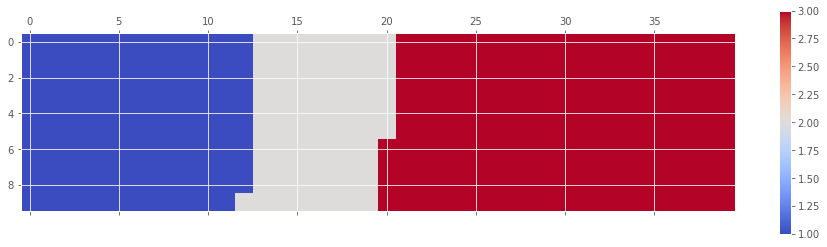

In [652]:
fig = plt.figure()

colormap = plt.cm.coolwarm           # 색상 지정
plt.matshow(waffle, cmap=colormap)   # matshow: matrix를 figure window에 보여주는 함수
plt.colorbar()                       # 우측에 legend같은 bar 생성

**Step 6.** Prettify the chart.


Axes(0.15,0.09;0.62x0.775)


<Figure size 432x288 with 0 Axes>

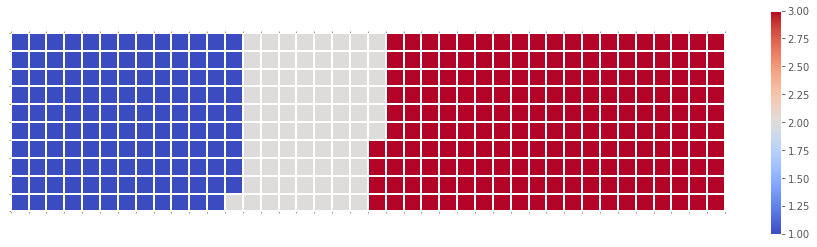

In [653]:
fig = plt.figure()

colormap = plt.cm.coolwarm           
plt.matshow(waffle, cmap=colormap)   
plt.colorbar()        

ax = plt.gca()    # gca: get current axes
print(ax)

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)       # np.arange = range
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)      # minor=True와 False의 tick 개수와 간격은 같음.
                                                             # minor=True인 경우, 기존 tick이 모두 minor(숫자 없음)가 되고 major(숫자) tick이 생김

# add grid based on minor ticks
ax.grid(which='minor', axis='both', color='w', linestyle='-', linewidth=2)

plt.xticks([])    # major tick(숫자와 실선) 삭제
plt.yticks([])   
plt.show()

# minor=False로 설정하고 major tick을 따라 grid를 그릴 수도 있음. 그러나 major tick을 삭제할 때 숫자와 실선이 함께 사라져 빈칸이 됨!!!

**Step 7.** Create a legend and add it to chart.


Axes(0.15,0.09;0.62x0.775)
[<matplotlib.patches.Patch object at 0x0000026FF38D4F88>, <matplotlib.patches.Patch object at 0x0000026FE92D5508>]
[<matplotlib.patches.Patch object at 0x0000026FF38D4F88>, <matplotlib.patches.Patch object at 0x0000026FE92D5508>, <matplotlib.patches.Patch object at 0x0000026FE9C02BC8>]


<Figure size 432x288 with 0 Axes>

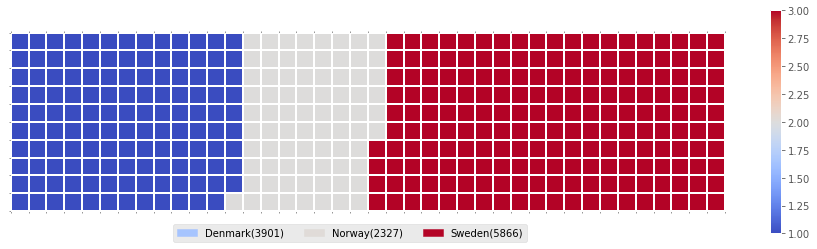

In [654]:
fig = plt.figure()

colormap = plt.cm.coolwarm           
plt.matshow(waffle, cmap=colormap)   
plt.colorbar()        

ax = plt.gca()    # gca: get current axes
print(ax)

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)       
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)      
                                                             

# add grid based on minor ticks
ax.grid(which='minor', axis='both', color='w', linestyle='-', linewidth=2)

plt.xticks([])    # major tick(숫자와 실선) 삭제
plt.yticks([])   

# cumulative sum - 이후 colormap 계산을 위해서
cumsum = np.cumsum(df_dns['Total'])              # 각 나라의 cumulative sum
total_cumsum = cumsum[len(cumsum)-1]             # 전체 sum

# legend 생성
leg_handles = []

for i, c in enumerate(df_dns.index) :
    color_val = colormap(cumsum[i] / total_cumsum)
    label_str = c + '(' + str(df_dns['Total'][i]) + ')'      # legend 항목에 들어가는 문구
    leg_handles.append(mpatches.Patch(color=color_val, label=label_str))     # mpatches.Patch: legend의 색(patch), 글자 생성
    print(str(leg_handles))

# legend 추가
plt.legend(handles=leg_handles,         # handles: patch나 line 추가
           loc= 'lower center',
           ncol=len(df_dns.index),      # 3열로 배치
           bbox_to_anchor=(0, -0.2, 0.95, 0.1))    # bbox: bounding box, 사각영역을 설정하고 이 안의 loc에 legend가 위치하게 됨
                                                   # (x, y, width, height): (width, height)를 가진 사각영역 하단 왼쪽 꼭지점이 (x, y)에 위치함
                                                   # 각각의 값은 실제 좌표가 아니라 비율값

And there you go! What a good looking _delicious_ `waffle` chart, don't you think?


Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called _create_waffle_chart_. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [655]:
def create_waffle_chart(categories, values, width, height, colormap, value_sign='') :
    
    # 각 카테고리의 비율 계산
    sum_values = values.sum()
    proportions = [(value/sum_values) for value in values]
    print('Proportion for each catecory:', prop)
    
    # 와플차트의 전체 타일 개수 설정
    total_tiles = width * height
    print('Total number of tiles:', total_tiles)
    
    # 각 카테고리가 차지하는 타일 개수를 계산
    tiles = [round(proportion * total_tiles) for proportion in proportions]
    
    for i, t in enumerate(tiles) :
        print(categories[i], ':', t)
        
    # 와플차트 만들 빈 행렬 생성
    waffle_chart = np.zeros((height, width))     
    
    # 와플차트 타일로 채우기
    category_index = 0
    tile_index = 0
    
    for col in range(width) :
        for row in range(height) :
            tile_index += 1
            waffle_chart[row, col] = category_index
            
            if tile_index == sum(tiles[0:category_index+1]) :
                category_index += 1
            
    # 와플차트 행렬을 시각화하기
    fig = plt.figure()
    plt.matshow(waffle_chart, cmap=colormap)       
    plt.colorbar()

    # 축을 가져와서 tick 그리기
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
    
    # minor tick에 grid 그리기
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.xticks([])             # major tick은 제거
    plt.yticks([])
    
    # legend 설정
    cum_sum = np.cumsum(values)
    total_sum = cum_sum[len(cum_sum) - 1]
    
    leg_handles = []
    
    for i, c in enumerate(categories) :
        color_val = colormap(cum_sum[i] / total_sum)     # legend color
        
        if value_sign == '$' :
            label_val = c + ' (' + value_sign + str(values[i]) + ')' 
        else :
            label_val = c + ' (' + str(values[i]) + value_sign + ')'
            
        leg_handles.append(mpatches.Patch(color=color_val, label=label_val))
        
    # legend를 차트에 추가
    plt.legend(handles=leg_handles, loc='center', ncol=len(categories), bbox_to_anchor=(0, -0.2, 1, 0.2))

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. 

Proportion for each catecory: [0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
Total number of tiles: 400
Denmark : 129.0
Norway : 77.0
Sweden : 194.0


<Figure size 432x288 with 0 Axes>

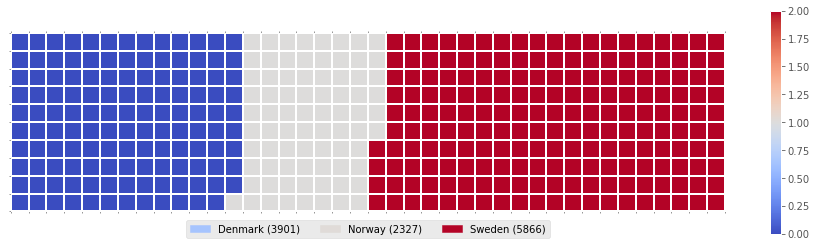

In [656]:
create_waffle_chart(df_dns.index, df_dns['Total'], 40, 10, plt.cm.coolwarm )

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), but it looks like the repository is still being built. But feel free to check it out and play with it.


# Word Clouds <a id="8"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.


First, let's install the package.


In [657]:
# # install wordcloud
# !conda install -c conda-forge wordcloud==1.4.1 --yes

# # import package and its set of stopwords
# from wordcloud import WordCloud, STOPWORDS

In [658]:
!pip install wordcloud
print('installation done!')

installation done!


In [659]:
!pip install wget

In [660]:
from wordcloud import WordCloud, STOPWORDS
import wget

`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled _Alice's Adventures in Wonderland_. Let's go ahead and download a _.txt_ file of the novel.


In [661]:
# # download file and save as alice_novel.txt
# !wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt
# # --quiet: 진행 상황 등을 출력하지 않음

# # open the file and read it into a variable alice_novel
# alice_novel = open('alice_novel.txt', 'r').read()
    
# print ('File downloaded and saved!')

In [662]:
# # wget: http 서버에서 크롤링을 통해 파일을 다운로드 ??????? 왜 안되나
# url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt'
# wget.download(url, 'alice_novel.txt')

# print('Download completed')

#### wget 오류로 인해서 urllib 이용

In [663]:
import urllib.request

In [664]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt'
urllib.request.urlretrieve(url, 'alice_novel.txt')

print('Download competed')

Download competed


In [665]:
# 파일 읽기
novel = open('alice_novel.txt', 'r').read()

Next, let's use the `STOPWORDS` list that we imported from `word_cloud`. We use the function _set_ to remove any redundant stopwords.


In [666]:
STOPWORDS     # 영어 불용어 집합(set)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [667]:
stopwords = set(STOPWORDS)      # 왜 필요하지???????????????

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [668]:
# word cloud object를 만들기 - 설정
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

# word cloud 만들기 - 시각화는 안됨
alice_wc.generate(novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


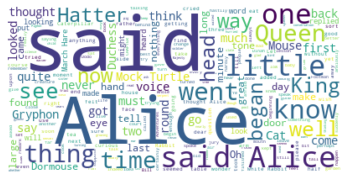

In [669]:
# word cloud 시각화
plt.imshow(alice_wc, interpolation='bilinear')     # generate된 'object'를 사용!!!  # interpolation: 글자 사이를 채우는 방법
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


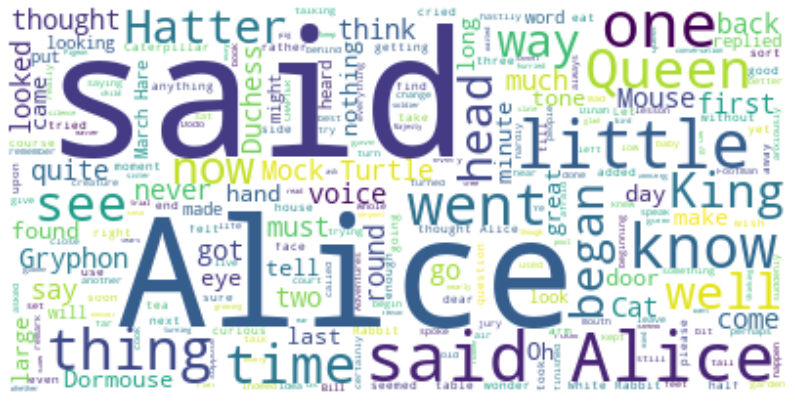

In [670]:
fig = plt.figure()
fig.set_figwidth(14)     # figsize=(14,18) 설정하는 것과 같음
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


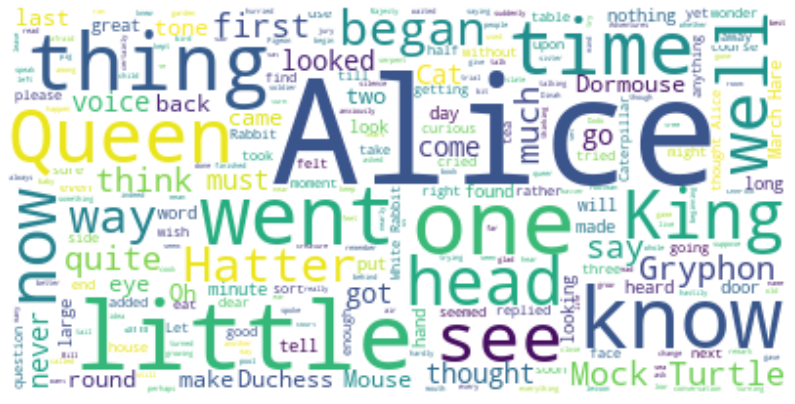

In [671]:
# object의 stopwords에 단어 추가
stopwords.add('said')  

# re-generate the word cloud
alice_wc.generate(novel)

# display
fig = plt.figure(figsize=(14, 18))       # 사이즈 조절
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it _alice_mask.png_.


In [672]:
# # download image
# !wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png
    
# # save the image into alice_mask matrix
# alice_mask = np.array(Image.open('alice_mask.png'))
    
# print('Image downloaded and saved!')

In [673]:
# urllib.request 이용하여 이미지 다운로드
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png'
urllib.request.urlretrieve(url, 'alice_mask.png')

# word cloud에 적용할 때, 하얀 부분은 버리고 다른 색에만 그림이 그려지기 때문에 배경이 무조건 하얀색이어야 한다!!!

('alice_mask.png', <http.client.HTTPMessage at 0x26feb6e01c8>)

In [674]:
from PIL import Image # converting images into arrays

get_image = Image.open('alice_mask.png')      # 이미지 불러오기
alice_mask = np.array(get_image)              # 이미지를 scalar data로 바꾸어 행렬로 저장. Mask로 쓰이는 이미지는 0~255 byte여야 함
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Let's take a look at how the mask looks like.


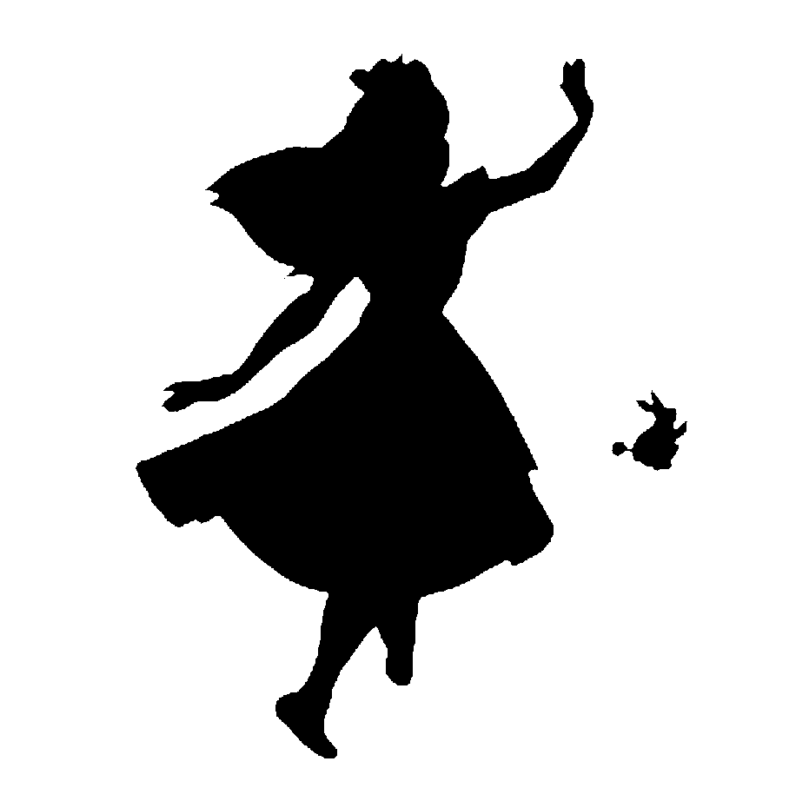

In [675]:
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')   # get_image(이미지), alice_mask(행렬) 모두 같은 결과
plt.axis('off')
plt.show()

Shaping the `word cloud` according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.


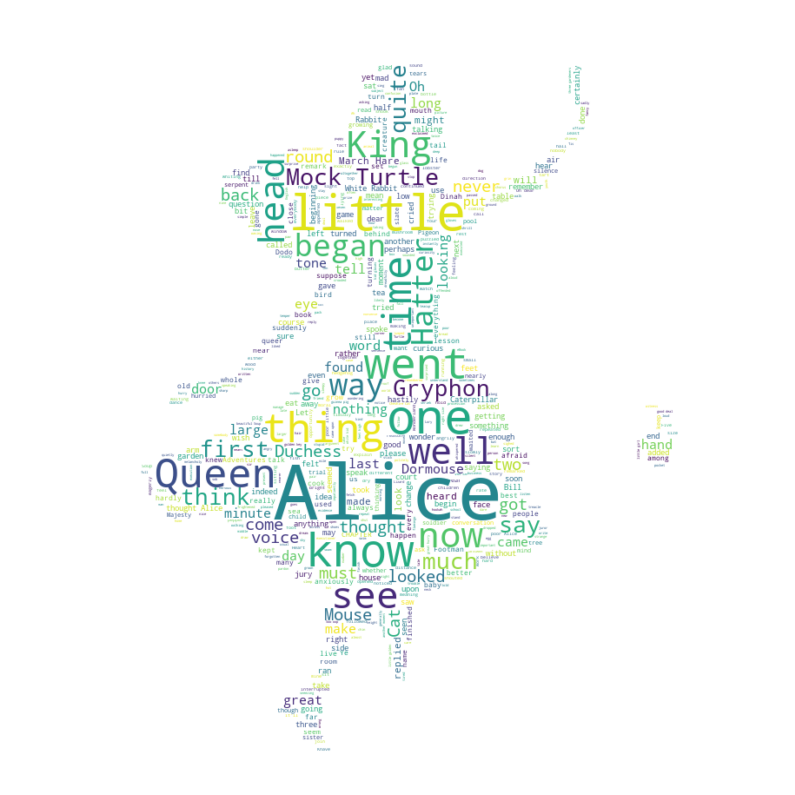

In [676]:
# alice_mask를 포함하는 object 만들기
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords, mask=alice_mask)

# generate the word cloud
alice_wc.generate(novel)

# display the generated object
plt.figure(figsize=(14, 18))        

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!


### Word Cloud of  Immigration Data
Unfortunately, our immmigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.


Let's recall how our data looks like.


In [677]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


And what was the total immigration from 1980 to 2013?


In [678]:
total = df_can['Total'].sum()
total

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [679]:
max_words = 90      # word cloud에 포함하는 최대 단어 수(실제로 한 단어 아닌 나라가 있어서 90이 채워지진 않음)
word_string = ''

for country in df_can.index : 
    
    # 나라 이름이 한 단어인지 확인하기
    if len(country.split(' ')) == 1 :
        repeat = int(df_can.loc[country, 'Total'] / total * max_words)     # 단어 90개 기준 등장하는 정도를 정수로 표현
        word_string = word_string + (country + ' ')*repeat

word_string    # text 완성 (China, India: 9번, Philippines: 7번, Pakistan: 3번)

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


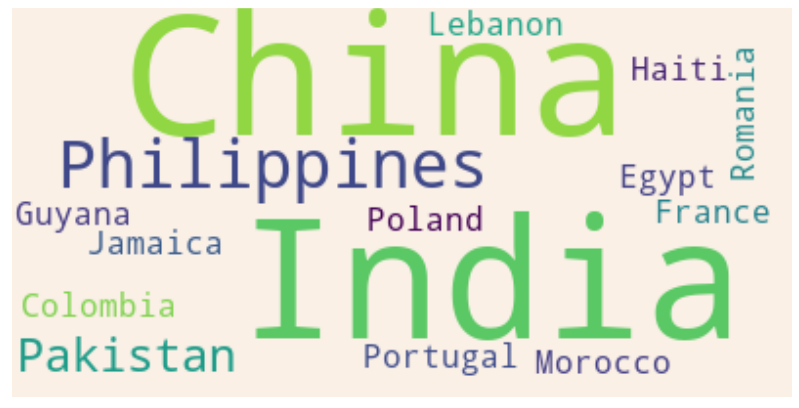

In [680]:
# 1. Object를 사용하는 방법

# word cloud object 만들기
country_wc = WordCloud(background_color='linen')

# word_string의 빈도를 이용하여 word cloud 만들기
country_wc.generate(word_string)

# display
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(country_wc, interpolation='bilinear')    # object 사용
plt.xticks([])
plt.yticks([])     # plt.axis('off')와 같음
plt.show()

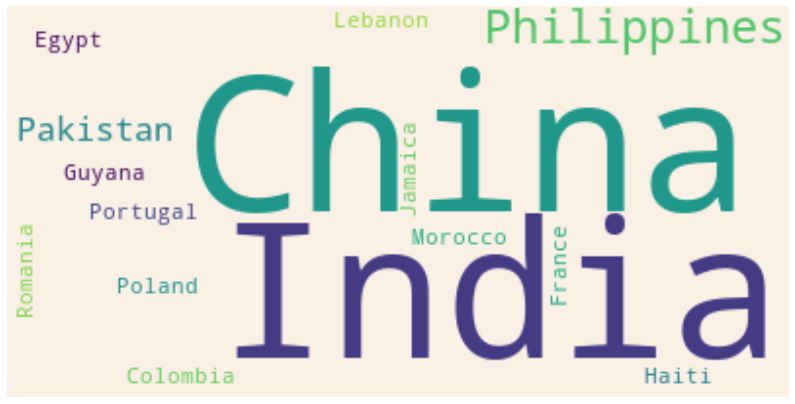

In [681]:
# 2. Generate를 사용하는 방법
country_wc_g = WordCloud(background_color='linen').generate(word_string)

fig = plt.figure(figsize=(14, 18))
plt.imshow(country_wc_g, interpolation='bilinear')      # generate 사용
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada as a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!


In [682]:
# 2글자 이상인 나라를 포함하여 collocation으로 인식하면 되지 않을까?
max_words = 90
word_string = ''

for country in df_can.index :
    repeat = int(round(df_can.loc[country, 'Total'] / total * max_words))    # 반내림 아니라 반올림
    word_string = word_string + (country + ' ')*repeat      # type(repeat)=int 여야 곱할 수 있음
    
word_string

'Afghanistan Algeria Bangladesh China China China China China China China China China Colombia Egypt El Salvador France France Germany Guyana Haiti India India India India India India India India India India Iran (Islamic Republic of) Iran (Islamic Republic of) Iraq Israel Jamaica Lebanon Lebanon Mexico Morocco Nigeria Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Republic of Korea Republic of Korea Romania Russian Federation Somalia South Africa Sri Lanka Sri Lanka Trinidad and Tobago Ukraine United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northe

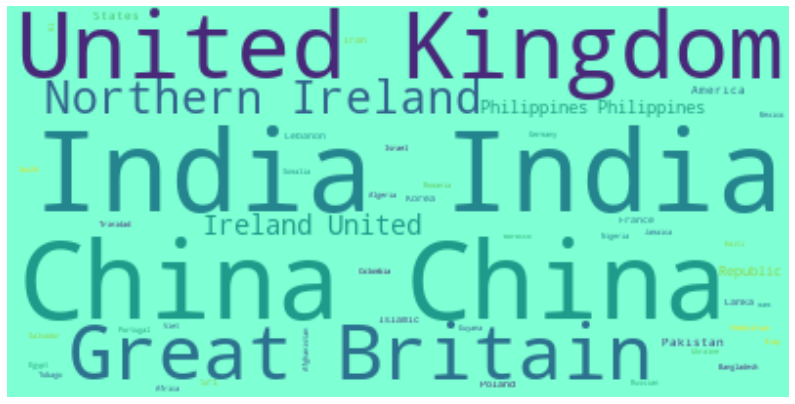

In [683]:
wordcloud_g = WordCloud(background_color='aquamarine', collocations=True).generate(word_string)    # collocation 인식 실패

plt.figure(figsize=(14, 18))
plt.imshow(wordcloud_g, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots <a id="10"></a>

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about _seaborn_ by following this [link](https://seaborn.pydata.org/?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740) and more about _seaborn_ regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740).


In lab _Pie Charts, Box Plots, Scatter Plots, and Bubble Plots_, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore _seaborn_ and see how efficient it is to create regression lines and fits using this library!


Let's first install _seaborn_


In [684]:
!conda install -c anaconda seaborn --yes
print('Seaborn installed !')

Solving environment: ...working... done

# All requested packages already installed.

Seaborn installed !


Create a new dataframe that stores the total number of landed immigrants to Canada per year from 1980 to 2013.


In [125]:
import seaborn as sns

# 매년 이민자의 합
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# index type을 float으로 - 나중에 regression line을 위해서
df_tot.index = map(float, df_tot.index)

# index를 컬럼으로 넣기
df_tot = df_tot.reset_index()

# 컬럼 이름 설정
df_tot.columns = ['Year', 'Total']

df_tot.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


With _seaborn_, generating a regression plot is as simple as calling the **regplot** function.


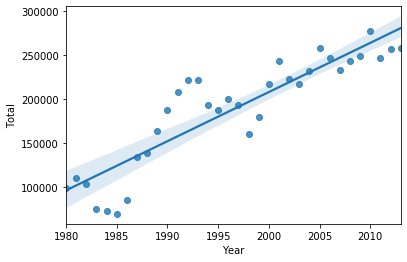

In [38]:
ax = sns.regplot(x='Year', y='Total', data=df_tot)

This is not magic; it is _seaborn_! You can also customize the color of the scatter plot and regression line. Let's change the color to green.


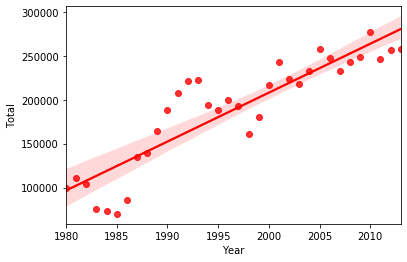

In [40]:
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='red')

You can always customize the marker shape, so instead of circular markers, let's use '+'.


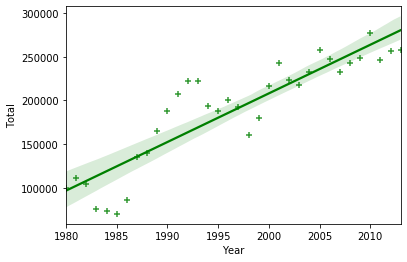

In [41]:
ax = sns.regplot('Year', 'Total', df_tot, color='green', marker='+')   # data marker=data point

Let's blow up the plot a little bit so that it is more appealing to the sight.


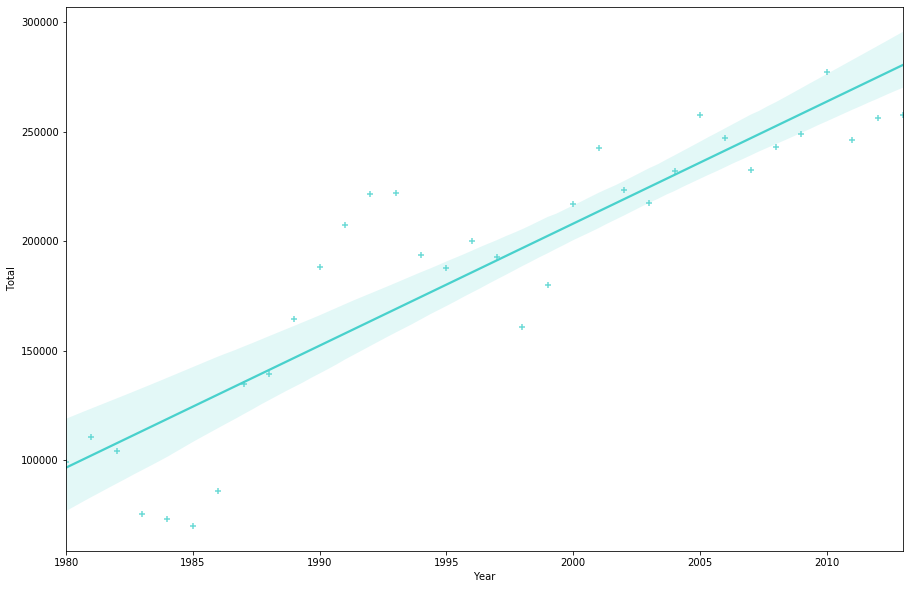

In [45]:
plt.figure(figsize=(15, 10))     # figure size 조정
ax = sns.regplot('Year', 'Total', df_tot, color='mediumturquoise', marker='+')   
# 위와 plt 연결고리가 없지만 사이즈가 조정되는 이유는 sns가 matplotlib 기반이기 때문일 것

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


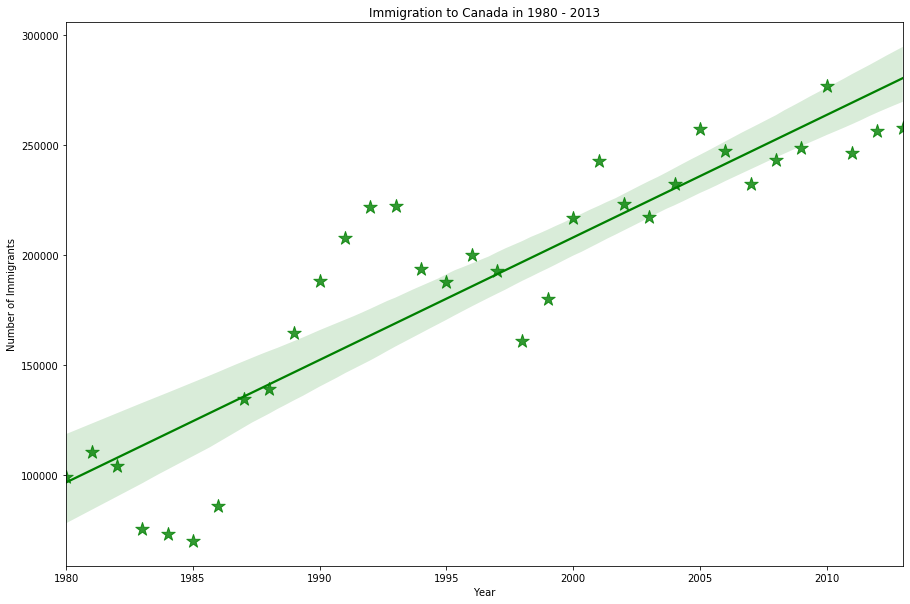

In [56]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='green', marker='*', scatter_kws={'s':200})  # marker 크기 조절

ax.set_title('Immigration to Canada in 1980 - 2013')
ax.set(xlabel='Year', ylabel='Number of Immigrants')       # ax.set_xlabel과 같음
plt.show()

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!


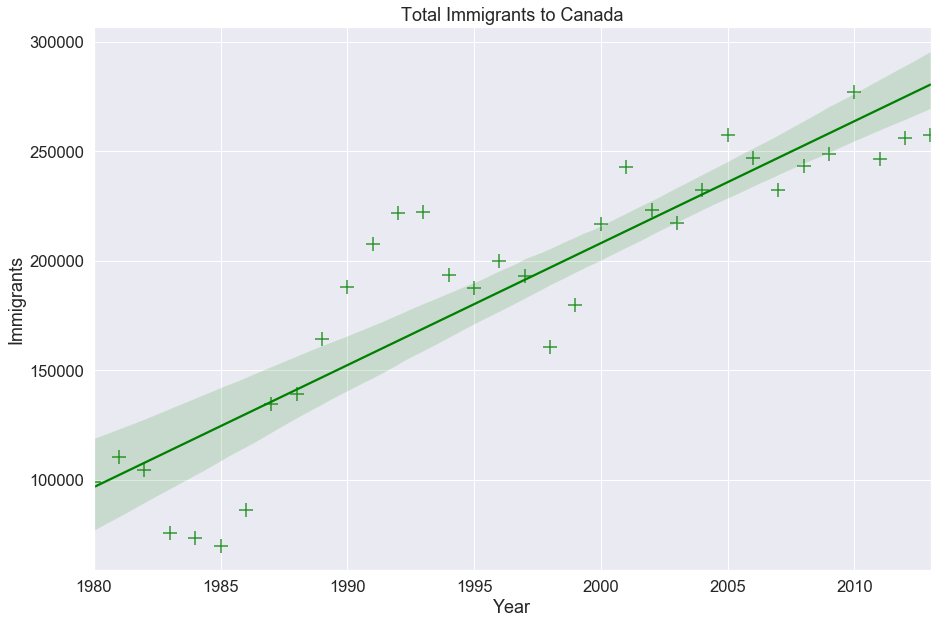

In [64]:
plt.figure(figsize=(15, 10))
ax = sns.regplot('Year', 'Total', df_tot, color='green', marker='+', scatter_kws={'s':200})
sns.set(font_scale=1.5)         # aesthetic parameter 설정 - 글씨 크기 조절

ax.set_title('Total Immigrants to Canada')
ax.set(xlabel='Year', ylabel='Immigrants')
plt.show()

Amazing! A complete scatter plot with a regression fit with 5 lines of code only. Isn't this really amazing?


If you are not a big fan of the purple background, you can easily change the style to a white plain background.


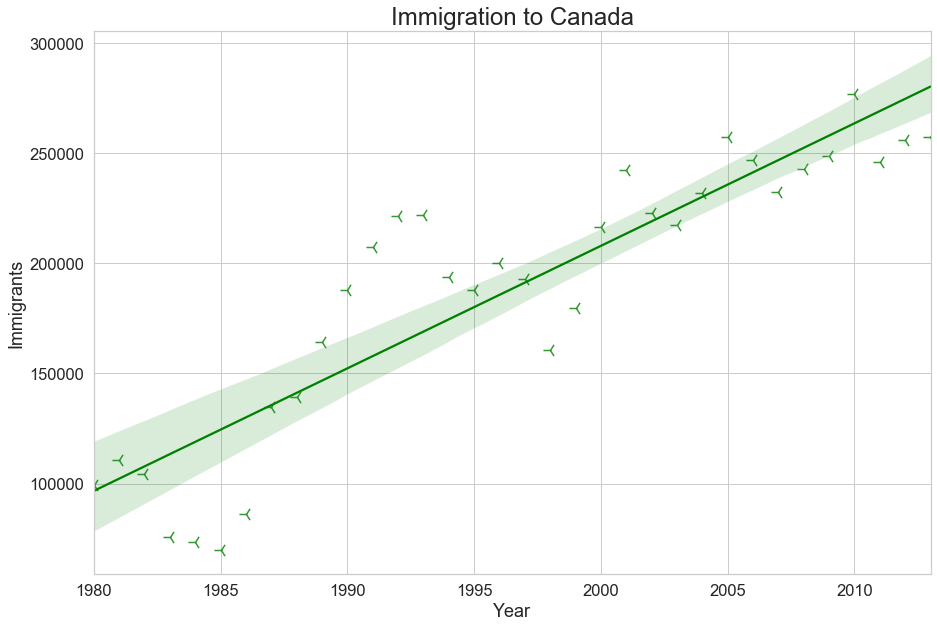

In [124]:
# 그래프 그리기
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color='green', marker='3', scatter_kws={'s':200})

# 스타일 설정
sns.set(font_scale=2)
sns.set_style('white')      # aesthetic style 설정 - 하얀 배경

# 글자 삽입
ax.set_title('Immigration to Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Immigrants')
plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [163]:
# Denmark, Norway, Sweden의 dataframe 만들기
series_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].sum(axis=0)
df_dns = pd.DataFrame(series_dns)

# year를 컬럼으로 넣기
df_dns.reset_index(inplace=True)

# 컬럼 이름 재설정
df_dns.columns = ['Year', 'Total']

# dtype 확인
df_dns.dtypes                                    # year: object
df_dns['Year'] = df_dns['Year'].astype(int)    # float으로 변경 - reg line 때문

df_dns.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


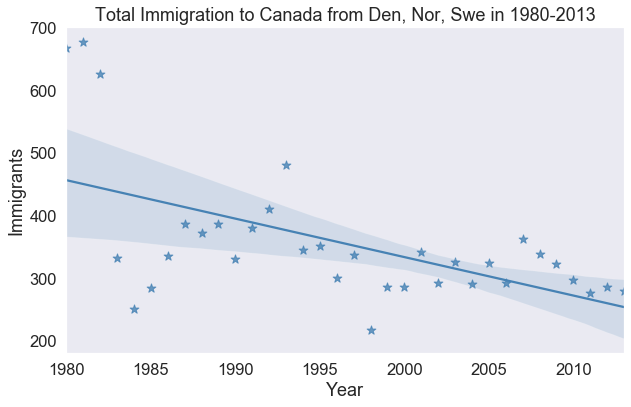

In [164]:
# regression plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
ax = sns.regplot(x='Year', y='Total', data=df_dns, color='steelblue', marker='*', scatter_kws={'s':85})

sns.set(font_scale=1.5)
sns.set_style('dark')

plt.title('Total Immigration to Canada from Den, Nor, Swe in 1980-2013')   # plt도 되는지 일부러 사용함
ax.set(xlabel='Year', ylabel='Immigrants')
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

```

</details>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Alex Aklson</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2021-01-21        | 2.2     | Lakshmi Holla | Updated TOC markdown cell          |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL of excel file          |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
